
[SKENARIO A] Profil Daya Listrik P(t)
Parameter: a=0, b=10, n=20
Hasil Metode Trapesium : 1360.1194 Joule
Hasil Metode Simpson   : 1367.9459 Joule


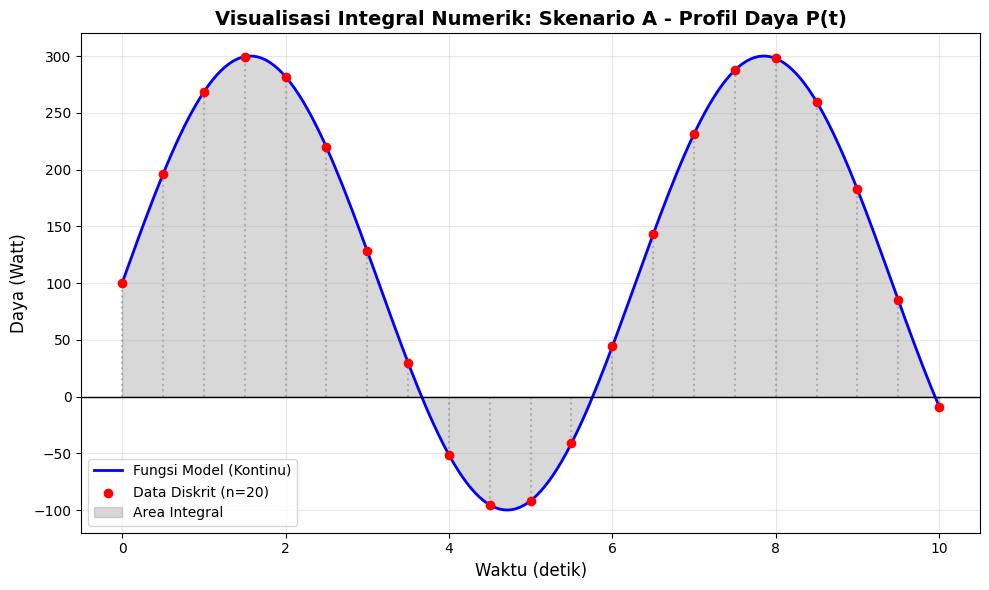


[SKENARIO B] Profil Konsumsi Bahan Bakar R(v)
Parameter: a=0, b=20, n=20
Hasil Metode Trapesium : 213.4000 Liter
Hasil Metode Simpson   : 213.3333 Liter


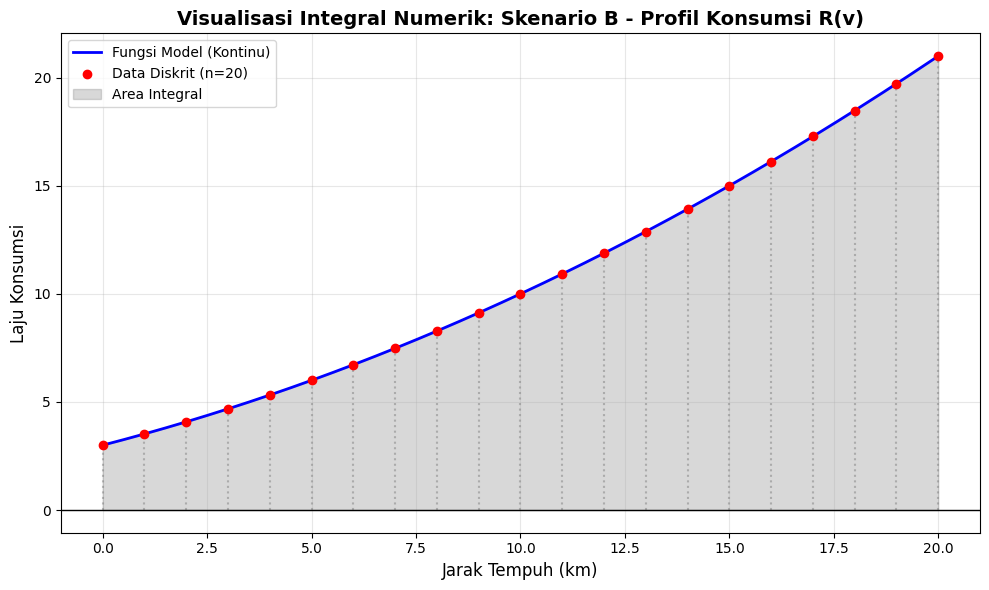

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fungsi_P(t):                 # Skenario A (Profil Daya Listrik)
    return 100 + 200 * np.sin(t) # 100 + 200sin(t)

def fungsi_R(v):                      # Skenario B (Profil Konsumsi Bahan Bakar)
    return 0.02 * v**2 + 0.5 * v + 3  # 0.02v^2 + 0.5v + 3

def metode_trapesium(fungsi, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = fungsi(x)

    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])
    
    return integral, x, y

def metode_simpson(fungsi, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = fungsi(x)
    
    sigma_ganjil = np.sum(y[1:n:2]) 
    sigma_genap = np.sum(y[2:n:2])
    
    integral = (h / 3) * (y[0] + 4 * sigma_ganjil + 2 * sigma_genap + y[n])
    
    return integral

def plot_grafik(fungsi, a, b, n, judul, label_x, label_y, warna_fill):
    x_smooth = np.linspace(a, b, 200)
    y_smooth = fungsi(x_smooth)
    
    x_discrete = np.linspace(a, b, n + 1)
    y_discrete = fungsi(x_discrete)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_smooth, y_smooth, label='Fungsi Model (Kontinu)', color='blue', linewidth=2)
    plt.scatter(x_discrete, y_discrete, color='red', zorder=5, label=f'Data Diskrit (n={n})')
    plt.fill_between(x_smooth, y_smooth, alpha=0.3, color=warna_fill, label='Area Integral')
    
    for i in range(n + 1):
        plt.vlines(x_discrete[i], 0, y_discrete[i], linestyles='dotted', colors='gray', alpha=0.5)

    plt.title(f"Visualisasi Integral Numerik: {judul}", fontsize=14, fontweight='bold')
    plt.xlabel(label_x, fontsize=12)
    plt.ylabel(label_y, fontsize=12)
    plt.axhline(0, color='black', linewidth=1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def main():
    # Skenario A
    a_A, b_A, n_A = 0, 10, 20
    hasil_trap_A, _, _ = metode_trapesium(fungsi_P, a_A, b_A, n_A)
    hasil_simp_A = metode_simpson(fungsi_P, a_A, b_A, n_A)

    print(f"\n[SKENARIO A] Profil Daya Listrik P(t)")
    print(f"Parameter: a={a_A}, b={b_A}, n={n_A}")
    print(f"Hasil Metode Trapesium : {hasil_trap_A:.4f} Joule")
    print(f"Hasil Metode Simpson   : {hasil_simp_A:.4f} Joule")

    plot_grafik(fungsi_P, a_A, b_A, n_A, 
                "Skenario A - Profil Daya P(t)", 
                "Waktu (detik)", "Daya (Watt)", "gray")

    # Skenario B
    a_B, b_B, n_B = 0, 20, 20
    hasil_trap_B, _, _ = metode_trapesium(fungsi_R, a_B, b_B, n_B)
    hasil_simp_B = metode_simpson(fungsi_R, a_B, b_B, n_B)

    print(f"\n[SKENARIO B] Profil Konsumsi Bahan Bakar R(v)")
    print(f"Parameter: a={a_B}, b={b_B}, n={n_B}")
    print(f"Hasil Metode Trapesium : {hasil_trap_B:.4f} Liter")
    print(f"Hasil Metode Simpson   : {hasil_simp_B:.4f} Liter")

    plot_grafik(fungsi_R, a_B, b_B, n_B, 
                "Skenario B - Profil Konsumsi R(v)", 
                "Jarak Tempuh (km)", "Laju Konsumsi", "gray")

if __name__ == "__main__":
    main()